# CAPSTONE PROJECT
### Severity of Accidents

This project will be used to analyze accidents' data and predict its severity using Machine Learning models. More over, there needs to be some data cleaning before diving into the modeling.

In [1]:
import numpy as np
import pandas as pd

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [3]:
path='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df=pd.read_csv(path)
df.head()

C:\Users\EMILIO\Anaconda3\envs\datascience\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.columns.sort_values(ascending=True)

Index(['ADDRTYPE', 'COLDETKEY', 'COLLISIONTYPE', 'CROSSWALKKEY',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'HITPARKEDCAR', 'INATTENTIONIND',
       'INCDATE', 'INCDTTM', 'INCKEY', 'INTKEY', 'JUNCTIONTYPE', 'LIGHTCOND',
       'LOCATION', 'OBJECTID', 'PEDCOUNT', 'PEDCYLCOUNT', 'PEDROWNOTGRNT',
       'PERSONCOUNT', 'REPORTNO', 'ROADCOND', 'SDOTCOLNUM', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'SEGLANEKEY', 'SEVERITYCODE', 'SEVERITYCODE.1',
       'SEVERITYDESC', 'SPEEDING', 'STATUS', 'ST_COLCODE', 'ST_COLDESC',
       'UNDERINFL', 'VEHCOUNT', 'WEATHER', 'X', 'Y'],
      dtype='object')

In [5]:
labels = ['X','Y','OBJECTID','INCKEY','COLDETKEY','INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC',
          'SEVERITYDESC','SEVERITYCODE.1','CROSSWALKKEY','INCDATE','LOCATION','SDOTCOLNUM',
          'SEGLANEKEY','SDOT_COLDESC', 'STATUS','ST_COLCODE', 'ST_COLDESC','PEDCOUNT', 'PEDCYLCOUNT',
       'PEDROWNOTGRNT','PERSONCOUNT','SDOT_COLCODE','VEHCOUNT','HITPARKEDCAR','INCDTTM']
df_filtered=df.drop(columns=labels,axis=1)
df_filtered.head()

,SEVERITYCODE,REPORTNO,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,3502005,Intersection,Angles,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN
1,1,2607959,Block,Sideswipe,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,1482393,Block,Parked Car,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN
3,1,3503937,Block,Other,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN
4,2,1807429,Intersection,Angles,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN


In [6]:
df_filtered.shape

(194673, 11)

### Exploratory Analysis

First, I want to check if there are repeated rows of information and delete them if necessary.

In [7]:
df_filtered.rename(columns={'SEVERITYCODE':'SEVERITY'},inplace=True)
df_filtered.head()

,SEVERITY,REPORTNO,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,3502005,Intersection,Angles,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN
1,1,2607959,Block,Sideswipe,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,1482393,Block,Parked Car,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN
3,1,3503937,Block,Other,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN
4,2,1807429,Intersection,Angles,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN


In [8]:
df_filtered = df_filtered.drop_duplicates()
df_filtered.shape

(194670, 11)

This means that there were 3 duplicated rows.

In [9]:
df_filtered.drop(columns='REPORTNO',axis=1,inplace=True)

Next, I want to put the correct types in columns.

In [10]:
df_filtered.dtypes

SEVERITY           int64
ADDRTYPE          object
COLLISIONTYPE     object
JUNCTIONTYPE      object
INATTENTIONIND    object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING          object
dtype: object

Let's start with the INATTENTIONIND column. Let's change the Y value for 1s and the null values for 0 (given that the driver was actually paying attention).

In [11]:
df_filtered.rename(columns={'INATTENTIONIND':'LACK_ATTENTION'},inplace=True)

In [12]:
df_filtered['LACK_ATTENTION'].replace('Y','1',inplace=True)
df_filtered['LACK_ATTENTION'].replace(np.nan,'0',inplace=True)
df_filtered['LACK_ATTENTION'].value_counts()

0    164866
1     29804
Name: LACK_ATTENTION, dtype: int64

Let's now change it to the type 'int64'.

In [13]:
df_filtered['LACK_ATTENTION']=df_filtered['LACK_ATTENTION'].astype('int64')
df_filtered['LACK_ATTENTION'].dtypes

dtype('int64')

Let's repeat the same for the columns UNDERINFL and SPEEDING. (Yes will be represented as 1 and No as 0)

In [14]:
df_filtered['UNDERINFL'].isnull().value_counts()

False    189786
True       4884
Name: UNDERINFL, dtype: int64

There are some missing values in UNDERINFL. Given that it would be a guess to put either Yes or No for these cases, it is better to drop those rows.

In [15]:
before= df_filtered.shape[0]
df_filtered.dropna(axis=0, subset=['UNDERINFL'], inplace=True)
after= df_filtered.shape[0]
print('Number of dropped rows: %.0f' %(before-after))

Number of dropped rows: 4884


In [16]:
df_filtered['UNDERINFL'].replace('Y','1',inplace=True)
df_filtered['UNDERINFL'].replace('N','0',inplace=True)
df_filtered['UNDERINFL']=df_filtered['UNDERINFL'].astype('int64')
df_filtered['UNDERINFL'].dtypes

dtype('int64')

For SPEEDING:

In [17]:
df_filtered['SPEEDING'].replace('Y','1',inplace=True)
df_filtered['SPEEDING'].replace(np.nan,'0',inplace=True)
df_filtered['SPEEDING']=df_filtered['SPEEDING'].astype('int64')
df_filtered['SPEEDING'].dtypes

dtype('int64')

In [18]:
df_filtered.dtypes

SEVERITY           int64
ADDRTYPE          object
COLLISIONTYPE     object
JUNCTIONTYPE      object
LACK_ATTENTION     int64
UNDERINFL          int64
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING           int64
dtype: object

Moving on to categorical variables, first we need to check for missing values.

In [19]:
df_filtered.isnull().sum().to_frame('Null_Counts').transpose()

,SEVERITY,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,LACK_ATTENTION,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
Null_Counts,0,1819,21,6178,0,0,197,128,286,0


In the ADDRTYPE, JUNCTIONTYPE, COLLISIONTYPE columns, the NaN values can be changed to "other" or "unknown".

In [20]:
df_filtered['ADDRTYPE'].replace(np.nan,'Other Address Type',inplace=True)
df_filtered['JUNCTIONTYPE'].replace('Unknown','Unknown Junction Type',inplace=True)
df_filtered['JUNCTIONTYPE'].replace(np.nan,'Unknown Junction Type',inplace=True)
df_filtered['COLLISIONTYPE'].replace('Other','Other Collision Type',inplace=True)
df_filtered['COLLISIONTYPE'].replace(np.nan,'Other Collision Type',inplace=True)
df_filtered.isnull().sum().to_frame('Null_Counts').transpose()

,SEVERITY,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,LACK_ATTENTION,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
Null_Counts,0,0,0,0,0,0,197,128,286,0


For the remaining columns, it is easier just to remove the rows that contain NaN values.

In [21]:
df_filtered.dropna(axis=0, subset=['WEATHER','ROADCOND','LIGHTCOND'], inplace=True)
df_filtered.isnull().sum().to_frame('Null_Counts').transpose()

,SEVERITY,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,LACK_ATTENTION,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
Null_Counts,0,0,0,0,0,0,0,0,0,0


There are no more values on the data set, therefore, I want to start looking for visuals.

In [22]:
df_filtered.shape

(189334, 10)

In [23]:
df_filtered.dtypes

SEVERITY           int64
ADDRTYPE          object
COLLISIONTYPE     object
JUNCTIONTYPE      object
LACK_ATTENTION     int64
UNDERINFL          int64
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING           int64
dtype: object

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [25]:
df_ADDR=df_filtered[['ADDRTYPE','SEVERITY']]
#df_ADDR.groupby(['ADDRTYPE','SEVERITY']).size()
df_ADDR= pd.crosstab(df_ADDR.ADDRTYPE,df_ADDR.SEVERITY)

In [26]:
df_ADDR

SEVERITY,1,2
ADDRTYPE,,
Alley,662,80
Block,93891,29427
Intersection,36088,27374
Other Address Type,1643,169


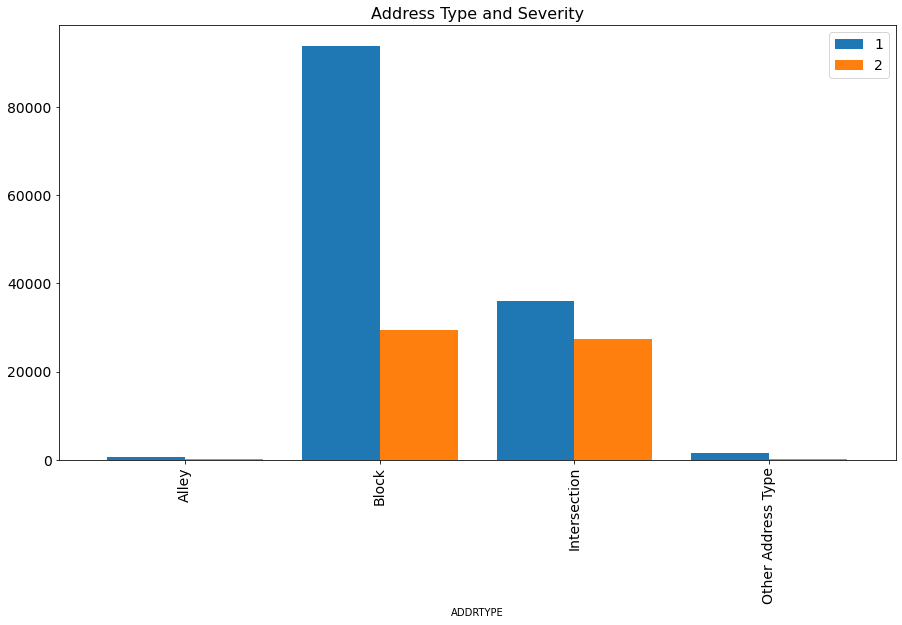

In [28]:
ax = df_ADDR.plot(kind='bar',
                    figsize=(15,8),
                    width=0.8,
                    fontsize=14,
                    )
ax.set_title('Address Type and Severity',fontsize=16)
ax.legend(fontsize=14)